# Example 01: MNIST Demo

## (i) Import libraries

In [1]:
import sys
sys.path.append('../')
import sys
import matplotlib.pyplot as plt
import visualization

## (ii) Plot classification accuracy
The dotted lines correspond to the epoch number at which the refinement phase started. 

In [2]:
# %matplotlib inline

# exp_dir = '/home/dummy/Project/SubspaceLearningMachine_SoftTree/experiments/cifar10/mbv2light/'
exp_dir = '/home/dummy/Project/SubspaceLearningMachine_SoftTree/experiments/cifar10/mbv2/'
# models_list = ["debug"]
models_list = ["run0", 'run1_with_0.8_expansion_4', "run1_with_1.4_expansion_8"]

records_file_list = [exp_dir + model_name + '/checkpoints/records.pkl' for model_name in models_list]
model_files = [exp_dir + model_name + '/checkpoints/model.pth' for model_name in models_list]

print(records_file_list)
print(model_files)

visualization.plot_performance(records_file_list, models_list, ymax = 3.0, figsize=(10,7), finetune_position=True)
visualization.plot_accuracy(records_file_list, models_list, figsize=(10,7), ymin=0, ymax=98, finetune_position=True)

['/home/dummy/Project/SubspaceLearningMachine_SoftTree/experiments/cifar10/mbv2/run0/checkpoints/records.pkl', '/home/dummy/Project/SubspaceLearningMachine_SoftTree/experiments/cifar10/mbv2/run1_with_0.8_expansion_4/checkpoints/records.pkl', '/home/dummy/Project/SubspaceLearningMachine_SoftTree/experiments/cifar10/mbv2/run1_with_1.4_expansion_8/checkpoints/records.pkl']
['/home/dummy/Project/SubspaceLearningMachine_SoftTree/experiments/cifar10/mbv2/run0/checkpoints/model.pth', '/home/dummy/Project/SubspaceLearningMachine_SoftTree/experiments/cifar10/mbv2/run1_with_0.8_expansion_4/checkpoints/model.pth', '/home/dummy/Project/SubspaceLearningMachine_SoftTree/experiments/cifar10/mbv2/run1_with_1.4_expansion_8/checkpoints/model.pth']
run0: test accuracy = 86.6500015258789
run1_with_0.8_expansion_4: test accuracy = 89.33999633789062
run1_with_1.4_expansion_8: test accuracy = 91.80000305175781


In [3]:
_ = visualization.compute_number_of_params(model_files, models_list, is_gpu=False)


Model: run0
Number of parameters summary:
    Total: 3613430 
    Max per branch: 3506828 
    Min per branch: 2685065 
    Average per branch: 3232907.0

Model: run1_with_0.8_expansion_4
Number of parameters summary:
    Total: 1863302 
    Max per branch: 1863302 
    Min per branch: 1863302 
    Average per branch: 1863302.0

Model: run1_with_1.4_expansion_8
Number of parameters summary:
    Total: 4888790 
    Max per branch: 4888790 
    Min per branch: 4888790 
    Average per branch: 4888790.0


## (iii) Compute model size

In [5]:
import ptflops

from models import Tree
from utils import load_tree_model

# model_path = "/home/dummy/Project/SubspaceLearningMachine_SoftTree/experiments/cifar10/mbv2light/run0/checkpoints/model.pth"
# model_path = '/home/dummy/Project/SubspaceLearningMachine_SoftTree/experiments/cifar10/mbv2/run0/checkpoints/model.pth'
# model_path = "/home/dummy/Project/SubspaceLearningMachine_SoftTree/experiments/cifar10/mbv2/run1_with_0.8_expansion_4/checkpoints/model.pth"
model_path = "/home/dummy/Project/SubspaceLearningMachine_SoftTree/experiments/cifar10/mbv2/run1_with_1.4_expansion_8/checkpoints/model.pth"
model = load_tree_model(model_path)
print(model)

flops, params = ptflops.get_model_complexity_info(model, (3, 32, 32), as_strings=True, print_per_layer_stat=True)
print('Flops:  ' + flops)
print('Params: ' + params)

Tree(
  (tree_modules): ModuleList(
    (0): Sequential(
      (transform): Root_MBV2(
        (features): Sequential(
          (0): InvertedResidual(
            (conv): Sequential(
              (0): Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=3, bias=False)
              (1): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              (2): ReLU6(inplace=True)
              (3): Conv2d(3, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
              (4): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            )
          )
          (1): InvertedResidual(
            (conv): Sequential(
              (0): Conv2d(16, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
              (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              (2): ReLU6(inplace=True)
              (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 

/home/dummy/Project/SubspaceLearningMachine_SoftTree/examples/../models.py:1810: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


## (iv) Visualise the tree structure

     Plotting:  hist_split_node_finetune.png


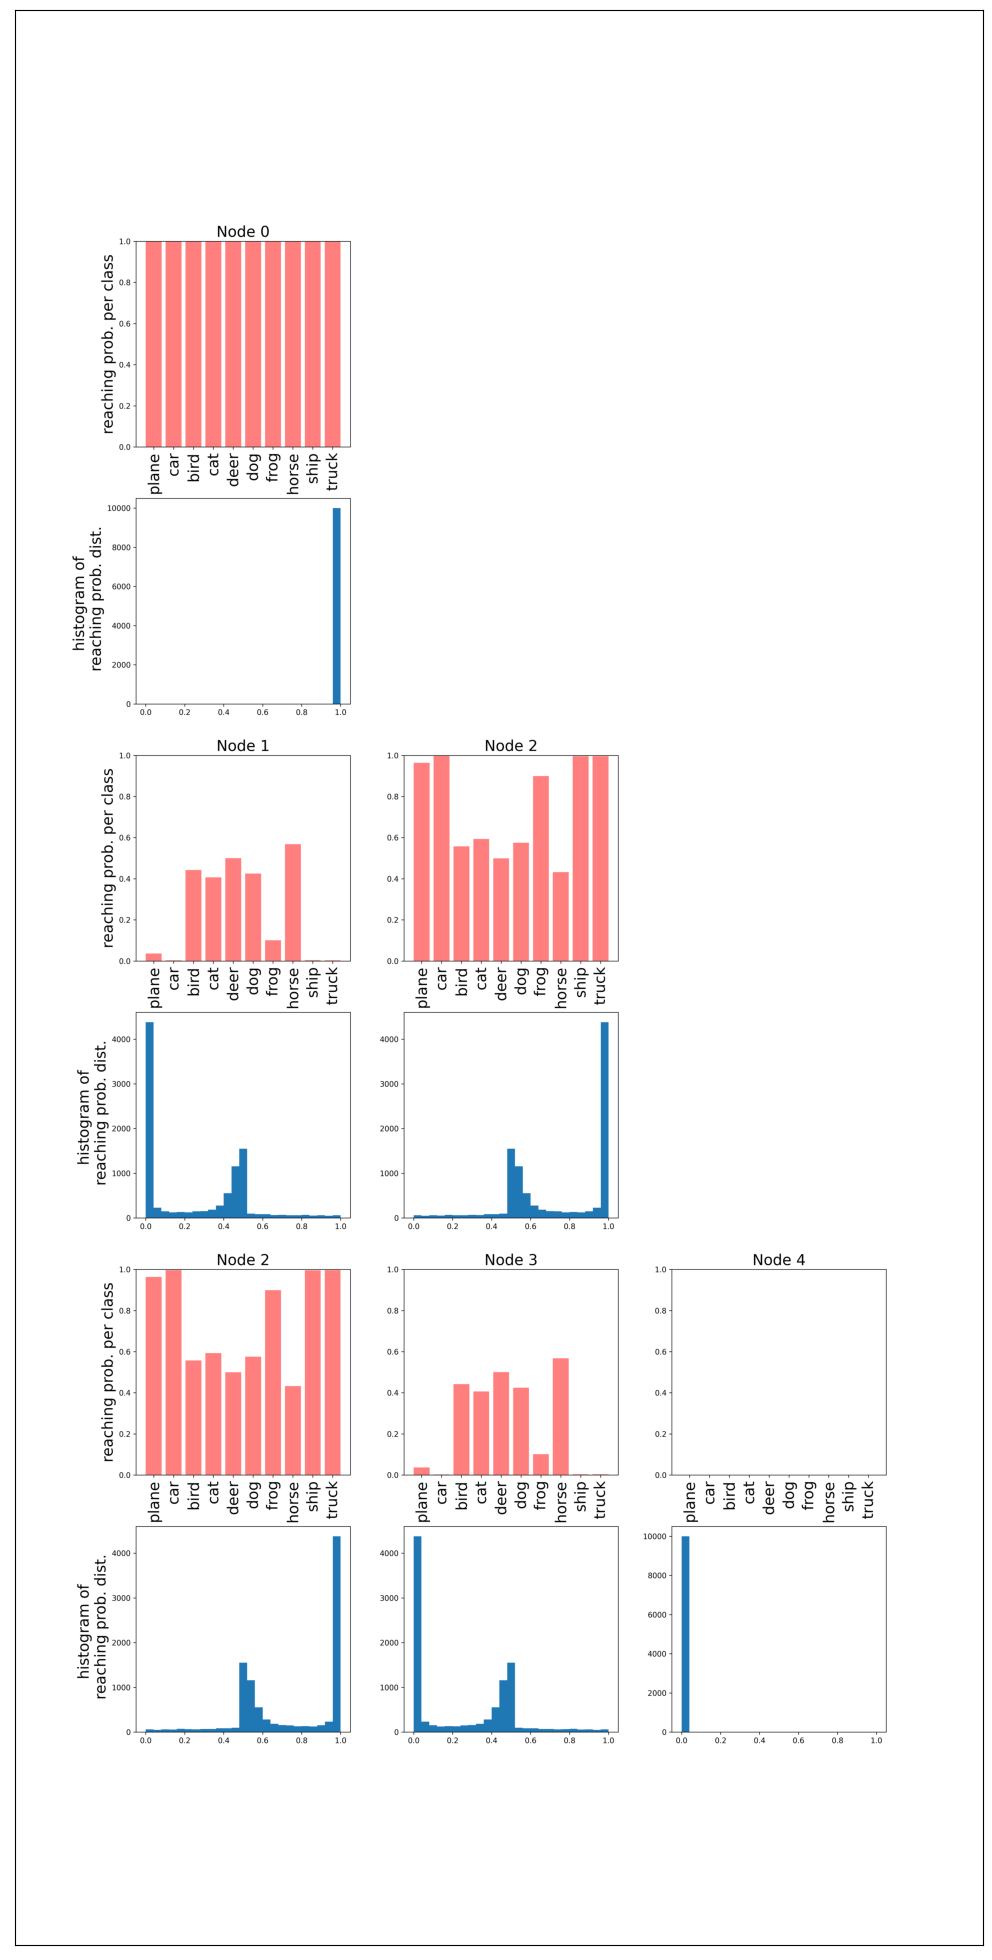

In [6]:
fig_dir = exp_dir + 'run0' + '/figures/'
visualization.visualize_treestructures(fig_dir, figsize=(10,20))